In [1]:
# Code to get all the Posterior mean (95% Equal-tail CI) (95% HPD CI) HPD-CI-width from ./xenarthra_mcmc_out.txt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Read the file
file = open("LG_G4_C20_cr_out.txt", "r")
lines = file.readlines()
file.close()

# Extract the data
data = []
mu_data = []
var_data = []

read_flag = False
for line in lines:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data.append(line)
    if read_flag and line.startswith("mu"):
        mu_data.append(line)
    if read_flag and line.startswith("sigma"):
        var_data.append(line)

In [2]:
data

['t_n103        36.1647 (33.5462, 42.5429) (33.4700, 41.2156)  7.7456 (Jnode 202)\n',
 't_n104        27.5467 (22.4499, 33.7526) (22.0755, 33.2395) 11.1640 (Jnode 201)\n',
 't_n105        26.4850 (21.5879, 32.4772) (21.2428, 32.0018) 10.7590 (Jnode 200)\n',
 't_n106        23.7306 (19.3336, 29.1771) (18.9255, 28.6503)  9.7247 (Jnode 199)\n',
 't_n107        23.0214 (18.7581, 28.3268) (18.4441, 27.8873)  9.4432 (Jnode 198)\n',
 't_n108        21.7257 (17.6958, 26.7720) (17.3666, 26.3089)  8.9424 (Jnode 197)\n',
 't_n109        10.7407 ( 8.5004, 14.3548) ( 8.2309, 13.8097)  5.5788 (Jnode 196)\n',
 't_n110        10.6453 ( 8.4276, 14.2351) ( 8.1515, 13.6792)  5.5277 (Jnode 195)\n',
 't_n111        10.3368 ( 8.1867, 13.8406) ( 7.9213, 13.2923)  5.3710 (Jnode 194)\n',
 't_n112         9.9274 ( 7.8607, 13.3084) ( 7.6098, 12.7739)  5.1641 (Jnode 193)\n',
 't_n113         9.4414 ( 7.4827, 12.6717) ( 7.2424, 12.1552)  4.9127 (Jnode 192)\n',
 't_n114         6.1227 ( 4.9711,  8.2283) ( 4.7782,  

In [3]:
node_name = []
posterior_mean_iqtree = []
posterior_mean_baseml = []

posterior_mean_mu_iqtree = []
posterior_mean_mu_baseml = []

posterior_mean_var_iqtree = []
posterior_mean_var_baseml = []

lower_ci_iqtree = []
upper_ci_iqtree = []

lower_ci_mu_iqtree = []
upper_ci_mu_iqtree = []

lower_ci_var_iqtree = []
upper_ci_var_iqtree = []

# Credible intervals for McmcDate
lower_ci_baseml = []
upper_ci_baseml = []

lower_ci_mu_baseml = []
upper_ci_mu_baseml = []

lower_ci_var_baseml = []
upper_ci_var_baseml = []

In [4]:
for line in data:
    line = line.strip().split()
    node_name.append(line[0])
    posterior_mean_iqtree.append(float(line[1]))
#     if line[3].startswith('('):
#         lower_ci_iqtree.append(float(line[3][1:-1]))
#     else:
#         lower_ci_iqtree.append(float(line[3][1:-1]))
#     if line[4].startswith('('):
#         upper_ci_iqtree.append(float(line[4][1:-1]))
#     else:
#         upper_ci_iqtree.append(float(line[4][:-1]))
#     # posterior_mean_baseml.append(float(line[4]))
#     # lower_ci_baseml.append(float(line[5]))
#     # upper_ci_baseml.append(float(line[6]))
# 
# for line in mu_data:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_mu_iqtree.append(float(line[1]))
#     lower_ci_mu_iqtree.append(float(line[3][:-1]))
#     upper_ci_mu_iqtree.append(float(line[4][:-1]))
#
# for line in var_data:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_var_iqtree.append(float(line[1]))
#     lower_ci_var_iqtree.append(float(line[3][:-1]))
#     upper_ci_var_iqtree.append(float(line[4][:-1]))

In [5]:
node_name

['t_n103',
 't_n104',
 't_n105',
 't_n106',
 't_n107',
 't_n108',
 't_n109',
 't_n110',
 't_n111',
 't_n112',
 't_n113',
 't_n114',
 't_n115',
 't_n116',
 't_n117',
 't_n118',
 't_n119',
 't_n120',
 't_n121',
 't_n122',
 't_n123',
 't_n124',
 't_n125',
 't_n126',
 't_n127',
 't_n128',
 't_n129',
 't_n130',
 't_n131',
 't_n132',
 't_n133',
 't_n134',
 't_n135',
 't_n136',
 't_n137',
 't_n138',
 't_n139',
 't_n140',
 't_n141',
 't_n142',
 't_n143',
 't_n144',
 't_n145',
 't_n146',
 't_n147',
 't_n148',
 't_n149',
 't_n150',
 't_n151',
 't_n152',
 't_n153',
 't_n154',
 't_n155',
 't_n156',
 't_n157',
 't_n158',
 't_n159',
 't_n160',
 't_n161',
 't_n162',
 't_n163',
 't_n164',
 't_n165',
 't_n166',
 't_n167',
 't_n168',
 't_n169',
 't_n170',
 't_n171',
 't_n172',
 't_n173',
 't_n174',
 't_n175',
 't_n176',
 't_n177',
 't_n178',
 't_n179',
 't_n180',
 't_n181',
 't_n182',
 't_n183',
 't_n184',
 't_n185',
 't_n186',
 't_n187',
 't_n188',
 't_n189',
 't_n190',
 't_n191',
 't_n192',
 't_n193',

In [6]:
posterior_mean_iqtree

[36.1647,
 27.5467,
 26.485,
 23.7306,
 23.0214,
 21.7257,
 10.7407,
 10.6453,
 10.3368,
 9.9274,
 9.4414,
 6.1227,
 3.5709,
 2.4574,
 1.627,
 7.217,
 6.149,
 9.9032,
 6.4847,
 9.4931,
 7.6335,
 6.2352,
 5.2135,
 9.1868,
 8.6544,
 2.3658,
 10.2244,
 9.2456,
 7.1899,
 5.7679,
 6.5642,
 6.0054,
 5.051,
 4.7432,
 20.1822,
 16.0992,
 21.8826,
 20.0087,
 18.6448,
 15.2089,
 8.0254,
 14.595,
 12.783,
 11.3569,
 9.608,
 18.0644,
 16.6602,
 4.1089,
 1.8081,
 24.7325,
 23.0208,
 20.6156,
 20.0071,
 21.7712,
 14.3717,
 17.8033,
 14.0427,
 26.8393,
 25.2591,
 22.8857,
 21.4964,
 18.1533,
 12.0372,
 16.0068,
 22.4849,
 7.3873,
 22.6197,
 16.9591,
 16.4535,
 16.011,
 15.2149,
 13.9576,
 13.2911,
 12.8143,
 12.2502,
 10.9049,
 9.4073,
 7.9016,
 11.0591,
 10.374,
 8.2,
 9.362,
 11.9918,
 11.0833,
 10.2872,
 9.0109,
 6.4134,
 11.3068,
 10.1686,
 8.9904,
 13.2388,
 12.5217,
 11.853,
 10.5034,
 7.6848,
 11.8451,
 7.4905,
 6.0365,
 2.2859,
 16.3228,
 13.958]

In [7]:
lower_ci_iqtree

[]

In [8]:
upper_ci_iqtree

[]

In [9]:
file_LG = open("LG_cr_out.txt", "r")
lines1 = file_LG.readlines()
file_LG.close()

# Extract the data
data1 = []
mu_data1 = []
var_data1 = []

read_flag = False
for line in lines1:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data1.append(line)
    if read_flag and line.startswith("mu"):
        mu_data1.append(line)
    if read_flag and line.startswith("sigma"):
        var_data1.append(line)

        
for line in data1:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_baseml.append(float(line[1]))
#     if line[3].startswith('('):
#         lower_ci_baseml.append(float(line[3][1:-1]))
#     else:
#          lower_ci_baseml.append(float(line[3][:-1]))
#     if line[4].startswith('('):
#         upper_ci_baseml.append(float(line[4][1:-1]))
#     else:
#          upper_ci_baseml.append(float(line[4][:-1]))
#         
#     
# for line in mu_data1:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_mu_baseml.append(float(line[1]))
#     lower_ci_mu_baseml.append(float(line[3][:-1]))
#     upper_ci_mu_baseml.append(float(line[4][:-1]))
    
# for line in var_data1:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_var_baseml.append(float(line[1]))
#     lower_ci_var_baseml.append(float(line[3][:-1]))
#     upper_ci_var_baseml.append(float(line[4][:-1]))

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# # Example data
# # Posterior means for MCMCtree (x-axis) and McmcDate (y-axis)
# posterior_mean_mcmctree = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# posterior_mean_mcmcdate = [110, 210, 310, 410, 510, 610, 710, 810, 910, 1010]
# 
# # Credible intervals for MCMCtree
# lower_ci_mcmctree = [90, 180, 270, 360, 450, 540, 630, 720, 810, 900]
# upper_ci_mcmctree = [110, 220, 330, 440, 550, 660, 770, 880, 990, 1100]
# 
# # Credible intervals for McmcDate
# lower_ci_mcmcdate = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# upper_ci_mcmcdate = [120, 220, 320, 420, 520, 620, 720, 820, 920, 1020]

# Calculate error bars
# xerr = [np.array(lower_ci_baseml), 
#         np.array(upper_ci_baseml)]
# yerr = [np.array(lower_ci_iqtree), 
#         np.array(upper_ci_iqtree)]
# 
# # Plotting
# fig, ax = plt.subplots(figsize=(15, 15))
# ax.plot([-0.1,90], 
#         [-0.1, 90], 
#         'k--', label='y=x')
# ax.errorbar(posterior_mean_baseml, posterior_mean_iqtree, 
#             xerr=xerr, yerr=yerr, fmt='*', ecolor='r', capsize=3, label='95% HPD CI')
# 
# # Labels and title
# ax.set_xlabel('Posterior mean age LG [100 Mya]', fontsize=18)
# ax.set_ylabel('Posterior mean age LG+G4 [100 Mya]', fontsize=18)
# ax.set_title('Posterior mean age comparison between LG and LG+G4 models [t116 ~ B(1.25,2.482)]')
# ax.legend()
# 
# # Show plot
# # plt.show()
# plt.savefig('./animal_origin_posterior_mean_age_comparison_LG_G4_c11.png')

In [11]:
posterior_mean_baseml

[36.329,
 27.7719,
 26.2012,
 23.2887,
 22.3207,
 20.241,
 10.3183,
 10.1715,
 9.6378,
 9.087,
 8.5257,
 5.7117,
 3.6218,
 2.4573,
 1.6742,
 6.5097,
 5.3415,
 9.0915,
 5.9765,
 8.5959,
 6.7885,
 5.4082,
 4.9909,
 8.4516,
 7.8004,
 2.6017,
 9.5659,
 8.4624,
 6.5361,
 5.1805,
 6.0053,
 5.2953,
 4.2987,
 4.7891,
 18.5836,
 15.1447,
 20.8837,
 18.7051,
 16.8622,
 13.6905,
 7.6129,
 13.5015,
 11.3896,
 9.7896,
 8.0414,
 16.9113,
 15.2471,
 4.867,
 2.2776,
 23.4882,
 21.3273,
 18.4467,
 18.0771,
 20.1717,
 13.4328,
 16.4767,
 12.4899,
 26.7118,
 24.7,
 21.9206,
 20.0892,
 17.0024,
 11.9823,
 14.5881,
 21.4213,
 8.1786,
 21.7654,
 19.2077,
 18.0516,
 17.0523,
 15.8511,
 14.274,
 13.3917,
 12.6204,
 11.662,
 10.0599,
 8.4579,
 6.9717,
 10.3059,
 9.5089,
 7.4406,
 8.117,
 11.6323,
 10.4622,
 9.3704,
 7.9553,
 5.6629,
 10.5703,
 9.3467,
 7.9988,
 13.1188,
 12.0475,
 10.9466,
 9.3583,
 6.5461,
 11.3123,
 8.1163,
 6.2941,
 2.578,
 18.3922,
 15.5434]

In [12]:
posterior_mean_iqtree

[36.1647,
 27.5467,
 26.485,
 23.7306,
 23.0214,
 21.7257,
 10.7407,
 10.6453,
 10.3368,
 9.9274,
 9.4414,
 6.1227,
 3.5709,
 2.4574,
 1.627,
 7.217,
 6.149,
 9.9032,
 6.4847,
 9.4931,
 7.6335,
 6.2352,
 5.2135,
 9.1868,
 8.6544,
 2.3658,
 10.2244,
 9.2456,
 7.1899,
 5.7679,
 6.5642,
 6.0054,
 5.051,
 4.7432,
 20.1822,
 16.0992,
 21.8826,
 20.0087,
 18.6448,
 15.2089,
 8.0254,
 14.595,
 12.783,
 11.3569,
 9.608,
 18.0644,
 16.6602,
 4.1089,
 1.8081,
 24.7325,
 23.0208,
 20.6156,
 20.0071,
 21.7712,
 14.3717,
 17.8033,
 14.0427,
 26.8393,
 25.2591,
 22.8857,
 21.4964,
 18.1533,
 12.0372,
 16.0068,
 22.4849,
 7.3873,
 22.6197,
 16.9591,
 16.4535,
 16.011,
 15.2149,
 13.9576,
 13.2911,
 12.8143,
 12.2502,
 10.9049,
 9.4073,
 7.9016,
 11.0591,
 10.374,
 8.2,
 9.362,
 11.9918,
 11.0833,
 10.2872,
 9.0109,
 6.4134,
 11.3068,
 10.1686,
 8.9904,
 13.2388,
 12.5217,
 11.853,
 10.5034,
 7.6848,
 11.8451,
 7.4905,
 6.0365,
 2.2859,
 16.3228,
 13.958]

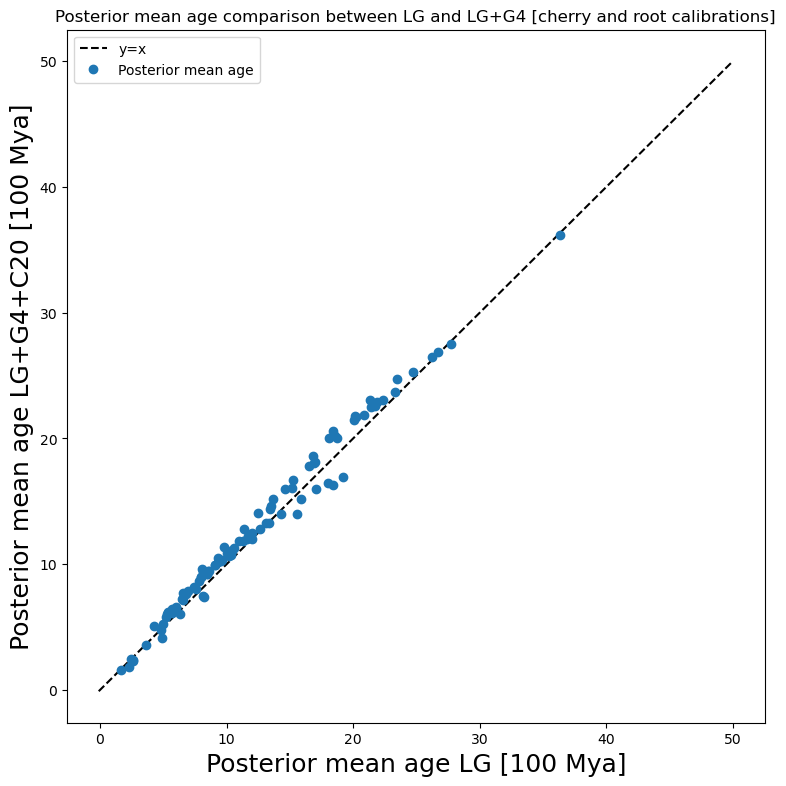

In [13]:
# Calculate error bars
xerr = [np.array(lower_ci_baseml), 
        np.array(upper_ci_baseml)]
yerr = [np.array(lower_ci_iqtree), 
        np.array(upper_ci_iqtree)]

# Plotting
fig, ax = plt.subplots(figsize=(9 ,9))
ax.plot([-0.1,50], 
        [-0.1, 50], 
        'k--', label='y=x')
ax.plot(posterior_mean_baseml, posterior_mean_iqtree, 'o', label='Posterior mean age')
 
# Labels and title
ax.set_xlabel('Posterior mean age LG [100 Mya]', fontsize=18)
ax.set_ylabel('Posterior mean age LG+G4+C20 [100 Mya]', fontsize=18)
ax.set_title('Posterior mean age comparison between LG and LG+G4 [cherry and root calibrations]')
ax.legend()

# point_x = posterior_mean_baseml[0]  # Example: first point in the list
# point_y = posterior_mean_iqtree[0]  # Example: first point in the list
# ax.annotate('Root age', xy=(point_x, point_y), xytext=(point_x - 0.1, point_y - 0.1), color='red')
# Show plot
# plt.show()
plt.savefig('./animal_origin_posterior_mean_age_comparison_LG_G4_C20_cr_scatter.png')

In [14]:
# fig, ax = plt.subplots(figsize=(9 ,9))
# ax.plot([0.01,0.04], 
#         [0.01, 0.04], 
#         'k--', label='y=x')
# ax.plot(posterior_mean_mu_baseml, posterior_mean_mu_iqtree, 'o', label='Posterior mean rates for partitions')
#  
# # Labels and title
# ax.set_xlabel('Posterior mean rate [LG]', fontsize=18)
# ax.set_ylabel('Posterior mean rate [LG+G4]', fontsize=18)
# ax.set_title('Posterior mean rate comparison between LG and LG+G4 [Cherry only calibration/IQ-TREE]')
# ax.legend()
# 
# # point_x = posterior_mean_baseml[0]  # Example: first point in the list
# # point_y = posterior_mean_iqtree[0]  # Example: first point in the list
# # ax.annotate('Root age', xy=(point_x, point_y), xytext=(point_x - 0.1, point_y - 0.1), color='red')
# # Show plot
# # plt.show()
# plt.savefig('./animal_origin__posterior_mean_rate_comparison_LG_G4_all_scatter.png')